In [1]:
import numpy as np
import keras
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def split_data(data):
        X = data[:,:-1]
        y = data[:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y,
                                                            test_size=0.33,
                                                            random_state=42)
        return X_train, X_test, y_train, y_test
        

def create_data(number_of_data:int, low_value:int, high_value:int) -> list:
        """Helper function for creating data between the interval of low_value and high_value."""
        data = []
        for i in range(number_of_data):
            x1 = np.random.randint(low=low_value, high=high_value)
            x2 = np.random.randint(low=low_value, high=high_value)
            if x1 < high_value//2 and x2 > high_value//2:
                data.append([x1,x2,1])
            elif x1 < high_value//2 and x2 < high_value//2:
                data.append([x1,x2,0])
            elif x1 > high_value//2 and x2 > high_value//2:
                data.append([x1,x2,0])
            else:
                data.append([x1,x2,1])
        data = split_data(np.asarray(data))
        return data  

In [3]:
data = create_data(number_of_data=1000, low_value=0, high_value=100)

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='relu', input_shape = (2,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.adam_v2.Adam(),
                loss='binary_crossentropy', 
                metrics=['accuracy'])

model.summary()
try:
    history = model.fit(data[0], data[2], batch_size=1, epochs=10)
except:
    raise Exception("Check if you have used the create_data method first.")
    
y_pred = 1 * (model.predict(data[1]) > 0.5)
print("Confusion Matrix: \n {}".format(confusion_matrix(data[3], y_pred)))
print('Accuracy on Test Data:{:.3}'.format(accuracy_score(data[3], y_pred)))

2022-03-06 00:55:25.795257: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
670/670 [==============================] - 4s 6ms/step - loss: 4.6003 - accuracy: 0.3552
Epoch 2/10
670/670 [==============================] - 3s 5ms/step - loss: 1.8670 - accuracy: 0.3522
Epoch 3/10
670/670 [==============================] - 4s 6ms/step - loss: 1.0790 - accuracy: 0.3866
Epoch 4/10
670/670 [==============================] - 3s 5ms/step - loss: 0.8147 - accuracy: 0.4030
Epoch 5/10
670/670 [==============================] - 3s 5

## Pytorch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)

    def forward(self, x):
        x_1 = torch.relu(self.dense1(x))
        x_2 = torch.sigmoid(self.dense2(x_1))
        return x_2

model = Net()

In [7]:
model

Net(
  (dense1): Linear(in_features=2, out_features=2, bias=True)
  (dense2): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
X_train_t = torch.from_numpy(data[0])
y_train_t = torch.from_numpy(data[2])
X_test_t = torch.from_numpy(data[1])
y_test_t = torch.from_numpy(data[3])

In [10]:
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train_t, y_train_t), batch_size=1)

In [11]:
%%time
for i in range(10):
    for t, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        y_pred = model(inputs.float())
        loss = criterion(y_pred,labels.float().reshape(-1,1))
        loss.backward()
        optimizer.step()

CPU times: user 6.92 s, sys: 148 ms, total: 7.07 s
Wall time: 11.7 s


In [12]:
y_pred = model(X_test_t.float())
y_pred = y_pred.detach().numpy()

In [13]:
y_pred = 1 * (y_pred  > 0.5)
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test_t, y_pred)))
print('Accuracy on Test Data:{:.3}'.format(accuracy_score(y_test_t, y_pred)))

Confusion Matrix: 
 [[119  49]
 [ 35 127]]
Accuracy on Test Data:0.745


In [15]:
## Fashion MNIST
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [17]:
import matplotlib.pyplot as plt

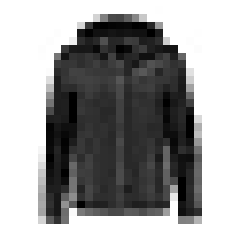

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

NameError: name 'save_fig' is not defined

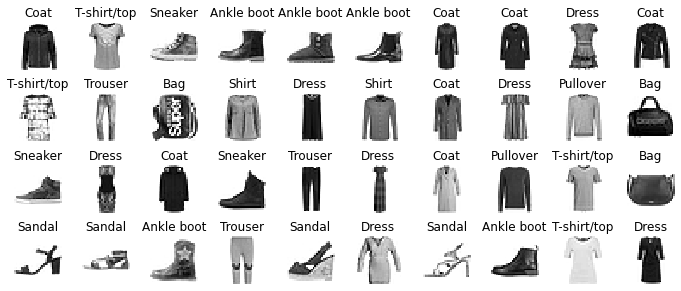

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.sgd_experimental.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7204 - sparse_categorical_accuracy: 0.7635 - val_loss: 0.5074 - val_sparse_categorical_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4895 - sparse_categorical_accuracy: 0.8287 - val_loss: 0.4492 - val_sparse_categorical_accuracy: 0.8448
Epoch 3/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4441 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4408 - val_sparse_categorical_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.8532 - val_loss: 0.3957 - val_sparse_categorical_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3960 - sparse_categorical_accuracy: 0.8600 - val_loss: 0.3840 - val_sparse_categorical_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3802 -

KeyboardInterrupt: 